In [0]:
import torch
import numpy as np
import torch.nn.functional as F

In [6]:
torch.cuda.is_available()

True

In [0]:
a = torch.FloatTensor([[2,3,4,5]])

# gpu에서 사용하고 싶으면 torch.cuda.floatTensor라고 해야한다.

In [9]:
# floattensor라서 실수형으로 저장된다. 
a

tensor([[2., 3., 4., 5.]])

In [0]:
b = np.array([[3,4,5,6]])

In [14]:
b.shape

(1, 4)

In [15]:
b.reshape(2,2)

array([[3, 4],
       [5, 6]])

In [17]:
a.view(2,2)

tensor([[2., 3.],
        [4., 5.]])

In [18]:
a.view(2,-1)

tensor([[2., 3.],
        [4., 5.]])

In [21]:
a.view(2,-1).flatten()

tensor([2., 3., 4., 5.])

In [23]:
a.unsqueeze(1).shape

torch.Size([1, 1, 4])

In [24]:
a.squeeze(0).shape

torch.Size([4])

In [25]:
torch.cuda.device_count()

1

In [0]:
device = torch.device('cuda')

a = a.to(device)

In [29]:
a  # cuda 메모리에 올라감 ( GPU를 사용하는 것임 )

tensor([[2., 3., 4., 5.]], device='cuda:0')

In [0]:
a = torch.cuda.FloatTensor(1024, 1024, 256)


In [32]:
!nvidia-smi

Mon Jul 29 05:33:11 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |   1795MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
linear = torch.nn.Linear(4,10)  # 인풋은 4개 hidden layer의 노드는 10개

In [0]:
x = torch.FloatTensor([0,-10,-1,-1])

In [51]:
linear(x)

tensor([ 3.6919, -2.0102,  1.6473,  1.6249, -0.5132, -1.2820,  5.2781, -2.1963,
        -2.4854,  4.3333], grad_fn=<AddBackward0>)

In [52]:
F.sigmoid(linear(x))  # warnning이 뜨면 torch.sigmoid라고 쓰면 좋다

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.9757, 0.1181, 0.8385, 0.8355, 0.3745, 0.2172, 0.9949, 0.1001, 0.0769,
        0.9870], grad_fn=<SigmoidBackward>)

In [53]:
F.tanh(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([ 0.9988, -0.9647,  0.9285,  0.9253, -0.4724, -0.8570,  0.9999, -0.9756,
        -0.9862,  0.9997], grad_fn=<TanhBackward>)

In [54]:
F.softmax(linear(x), dim=0)

tensor([1.2391e-01, 4.1374e-04, 1.6038e-02, 1.5683e-02, 1.8488e-03, 8.5699e-04,
        6.0533e-01, 3.4348e-04, 2.5725e-04, 2.3532e-01],
       grad_fn=<SoftmaxBackward>)

In [55]:
torch.sigmoid(linear(x))

tensor([0.9757, 0.1181, 0.8385, 0.8355, 0.3745, 0.2172, 0.9949, 0.1001, 0.0769,
        0.9870], grad_fn=<SigmoidBackward>)

In [0]:
torch.optis.

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.layer1 = nn.Linear(input_dim,hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        out = F.relu(self.layer1(x))
        out = F.relu(self.layer2(out))
        out = self.layer3(out)
        return out
    
    

In [0]:
lr = learning rate / epoch / batch / back propagation / 

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [0]:
from sklearn.datasets import fetch_california_housing

In [59]:
data = fetch_california_housing()

In [60]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [61]:
data.data.shape

(20640, 8)

In [62]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [63]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

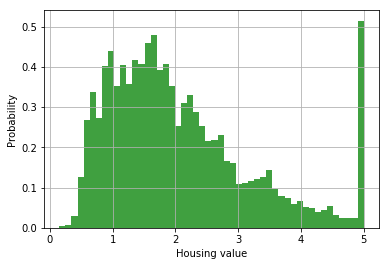

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(data.target, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Housing value')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [111]:
target = data.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
# target data 전체를 train용으로 쓰지 않는다. 자동으로 나눠주겠다. 

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [160]:
X_train.shape

(16512, 8)

In [161]:
data.data.shape

(20640, 8)

min max normalization을 해보자

0~1 범위로 만들어줌
[링크 텍스트](https://)

In [0]:
min_, max_ = y_train.min(), y_train.max()
y_train = (y_train - min_)/(max_ - min_)

In [0]:
# 각 feature 별로 정규화를 해보자


from sklearn.preprocessing import StandardScaler

In [0]:
std_scaler =  StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)
# X_train = std_scaler.fit_transform(X_train) 이라고 한번에 쓸 수도 있음

In [165]:
X_train  # 지금 numpy array라서 tensor로 바꿔주자

array([[ 2.49064475e+00,  2.62386384e-01,  5.65923234e-01, ...,
        -1.14090413e-01,  1.09460206e+00, -1.47613634e+00],
       [ 9.43843872e-01,  4.99447226e-01, -9.33053099e-02, ...,
        -7.68838511e-02,  8.09832470e-01, -1.23688677e+00],
       [-9.23526798e-01, -3.69775864e-01, -1.28679042e-01, ...,
         3.07719374e-01,  1.07126029e+00, -8.48106230e-01],
       ...,
       [ 1.99780242e+00,  1.28965004e+00,  8.57301428e-01, ...,
        -8.88022601e-02, -7.35392693e-01,  5.47516240e-01],
       [-1.17227668e+00, -4.48796145e-01,  2.23386194e-01, ...,
         5.52291281e-02,  2.30370574e+00, -1.41133958e+00],
       [-5.26585494e-01,  7.36508069e-01, -8.77971384e-04, ...,
        -8.01897767e-02, -6.88709154e-01,  1.13567142e+00]])

사진 설명 있음 그림1

In [0]:
X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

X_train, y_train = X_train.float(), y_train.float()
X_test, y_test = X_test.float(), y_test.float()

y_train, y_test = y_train.view(-1,1), y_test.view(-1,1)

In [167]:
X_train

tensor([[ 2.4906e+00,  2.6239e-01,  5.6592e-01,  ..., -1.1409e-01,
          1.0946e+00, -1.4761e+00],
        [ 9.4384e-01,  4.9945e-01, -9.3305e-02,  ..., -7.6884e-02,
          8.0983e-01, -1.2369e+00],
        [-9.2353e-01, -3.6978e-01, -1.2868e-01,  ...,  3.0772e-01,
          1.0713e+00, -8.4811e-01],
        ...,
        [ 1.9978e+00,  1.2897e+00,  8.5730e-01,  ..., -8.8802e-02,
         -7.3539e-01,  5.4752e-01],
        [-1.1723e+00, -4.4880e-01,  2.2339e-01,  ...,  5.5229e-02,
          2.3037e+00, -1.4113e+00],
        [-5.2659e-01,  7.3651e-01, -8.7797e-04,  ..., -8.0190e-02,
         -6.8871e-01,  1.1357e+00]])

In [0]:
from torch.utils.data import TensorDataset, DataLoader

In [0]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [0]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [189]:
for batch_x, batch_y, in train_loader:
    print(batch_x)
    print(batch_y)
    break
    

tensor([[-9.6566e-02,  4.2043e-01, -4.3127e-01, -8.6805e-02, -4.8891e-01,
         -1.4893e-01, -6.7937e-01,  5.5748e-01],
        [-1.2212e+00,  5.7847e-01, -5.4337e-01, -8.2659e-02, -8.1894e-01,
          4.4990e-02,  5.1573e-01, -1.2039e-01],
        [-7.9550e-01,  1.6848e+00, -6.1292e-01, -1.0228e-01,  9.7267e-01,
          3.3969e-02, -6.2802e-01,  1.3381e-01],
        [-5.0520e-01, -1.5551e+00, -7.3080e-01,  2.1187e-01,  3.2220e-01,
         -9.7729e-02, -8.6144e-01,  6.3225e-01],
        [-1.4065e-01,  1.8428e+00, -1.1156e-01, -1.6682e-01, -4.9415e-01,
         -1.5850e-02, -8.4276e-01,  8.2166e-01],
        [-1.2017e-01,  1.0526e+00, -7.7608e-02,  4.9597e-02, -1.7176e-03,
         -4.4542e-02,  1.0012e+00, -1.4562e+00],
        [ 4.5915e-01,  2.6239e-01,  5.3427e-02,  3.2389e-02,  3.3006e-01,
         -1.1669e-01,  8.3784e-01, -1.2768e+00],
        [-1.0435e-01, -2.9076e-01, -1.1790e+00,  3.4424e-01, -7.2377e-01,
         -2.6158e-01,  1.0152e+00, -1.4163e+00],
        [ 1.9452

In [0]:
import torch.nn as nn

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, 1)   # 예측 할 것이 집값 1개라서 그냥 1
        
#        self.layer1 = nn.Linear(hidden_dim, 1) 위의 두 줄이 이렇게 바뀌면 그냥 선형 회기다. 

    
    def forward(self,x):
        z1 = self.layer1(x)
        a1 = torch.relu(z1)
        z2 = self.layer2(a1)
        a2 = torch.sigmoid(z2)
        return a2

In [0]:
device = torch.device('cuda')

model = Model(8,32)
model = model.to(device)

mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [0]:
# 여기까지가 학습 직전까지의 준비

In [176]:
epochs = 10

model.train()

for e in range(epochs):
    for i, (batch_x, batch_y) in enumerate(train_loader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        
        # 이때 batch.size는 32,8
        
        predict = model(batch_x)
        loss = mse_loss(predict, batch_y)
        
        # gradient를 계산해서 학습을 시켰는데
        # back propagation을 하면서도 gradient를 계속 계산해서 같은 위치에 더하여 저장할 것이라서
        # 저장된 gradient를 초기화 해야 값이 혼동이 안된다. 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    # theta를 업데이트 함 (step을 하면 모델을 한번 업데이트 한 것)
        
        # 여기까지가 Trian에 관한 코드 끝
        
        
        if i % 200 == 0:
            
            # loss는 gpu 메모리에 있는 거라서 cpu 메모리에서 바로 출력하려면 에러난다
            loss = loss.item()  # 만약에 loss가 vector나 matrix라면 loss.cpu()라고 해야함.
            print(f"{e}epochs, {i} iters - {loss}") # f_string 기법

0epochs, 0 iters - 0.07544253766536713
0epochs, 200 iters - 0.01406486053019762
0epochs, 400 iters - 0.03594447299838066
1epochs, 0 iters - 0.015028955414891243
1epochs, 200 iters - 0.021696405485272408
1epochs, 400 iters - 0.01560427900403738
2epochs, 0 iters - 0.011542536318302155
2epochs, 200 iters - 0.019539710134267807
2epochs, 400 iters - 0.009089427068829536
3epochs, 0 iters - 0.019139505922794342
3epochs, 200 iters - 0.029220707714557648
3epochs, 400 iters - 0.01698814518749714
4epochs, 0 iters - 0.006161588244140148
4epochs, 200 iters - 0.01046186313033104
4epochs, 400 iters - 0.01800149492919445
5epochs, 0 iters - 0.014195891097187996
5epochs, 200 iters - 0.014403140172362328
5epochs, 400 iters - 0.018495386466383934
6epochs, 0 iters - 0.016919877380132675
6epochs, 200 iters - 0.011559756472706795
6epochs, 400 iters - 0.013700556010007858
7epochs, 0 iters - 0.009607464075088501
7epochs, 200 iters - 0.02525974251329899
7epochs, 400 iters - 0.018184809014201164
8epochs, 0 iters

In [187]:
l1_loss = nn.L1Loss()
test_num = 0
total_loss = []

# test 라서 gradient 안한다
with torch.no_grad():
    model.eval()
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device) 
        # batchx와 y를 gpu 메모리에서 복사해옴

        batch_x, batch_y = batch_x.to(device), batch_y.to(device) 
#       batch_x = (batch_x - std_scaler.mean_) / std_scaler.var_
        predict = model(batch_x)
        
        predict = (max_ - min_) * predict + min_
        loss = l1_loss(predict, batch_y)
        
        loss = loss.item()
        batch_size = batch_x.size(0)
        # 98을 32 size로 나눠서 하면 나머지 2개가 남아서, 크기를 더해준다고 했는데
        # 나머지 2개는 batch_x.size(0)가 아닌데, 어떻게 되는거지?
        total_loss.append(loss*batch_size)
        test_num += batch_size
        
total_loss = np.sum(total_loss)/test_num       
total_loss

0.40113620771918185

batch_size = 몇개의 데이터를 node로 만들 것인가

batch = full_batch = propagation 시킬 갯수가 전체 개수일ㄸ ㅐ

In [178]:
type(batch_x)

torch.Tensor

In [184]:
std_scaler.mean_

array([ 3.86995597e+00,  2.86795058e+01,  5.42810155e+00,  1.09537041e+00,
        1.42096724e+03,  3.01972468e+00,  3.56352719e+01, -1.19568467e+02])